## Importing the necessary basic packages

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import datetime

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Â°C
- 13 Relative Humidity (%)
- 14 AH Absolute Humidity 

In [2]:
data = pd.read_excel("AirQualityUCI.xlsx")
print(data.shape)
data.head()

(9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [5]:
#Adding the Date and Time to a single column

data.Date = data['Date'].astype(str)
data.Time = data['Time'].astype(str)
data.Date = data.Date + " " + data.Time
data.Date = pd.to_datetime(data.Date)

In [6]:
# Making the date column as the index and dropping the 'Date' and 'Time' columns.

data.index= data.Date
data.drop(['Date','Time'], axis=1, inplace=True)

In [7]:
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## Exploratory Data Analysis

In [8]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

As we can see, the data has no null values. We should check the data more extensively

In [9]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


We can see that for every column, the minimum value that has been recorded is -200. But this is not possible as these values should always be equal to or more than 0 as these are the constitution of compounds in the air.

In [10]:
data.replace(-200, np.nan, inplace=True)

In [11]:
data.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

We can see that mosr of the entries in NMHC(GT) column was -200 which is a wrong entry as the values can only be above 0. Therefore, we shall drop that column

In [12]:
data.drop('NMHC(GT)', axis=1, inplace=True)

In [13]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [14]:
data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082195,1102.604396,10.190299,942.422741,240.718147,832.618539,109.401453,1452.890358,1030.388426,18.315768,48.814853,1.017382
std,1.469801,219.599578,7.565011,269.583076,206.611257,255.704654,47.210774,347.427351,410.906048,8.822898,17.354492,0.404829
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.000000,938.250000,4.401596,732.500000,97.000000,654.500000,73.000000,1227.750000,726.000000,11.875000,35.425000,0.726213
50%,1.700000,1061.500000,8.276765,910.500000,174.000000,806.750000,102.000000,1459.750000,963.750000,17.575000,48.925001,0.987539
75%,2.800000,1237.250000,14.019301,1117.250000,318.000000,967.500000,137.000000,1676.750000,1286.500000,24.325000,61.875000,1.306671
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


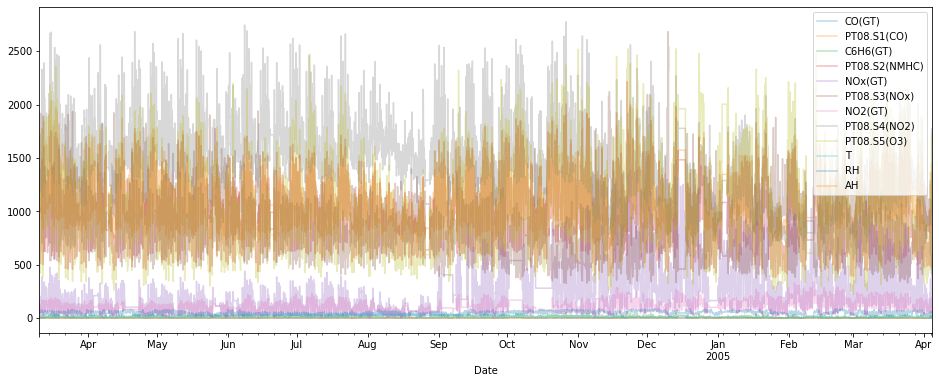

In [15]:
data.plot(figsize=(16,6), alpha=0.3);

We shall forecast the CO levels first.

## Forecast with Prophet

In [16]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [17]:
benzene = pd.DataFrame(data['C6H6(GT)'])
benzene.reset_index(inplace=True)
benzene.columns=['ds', 'y']
#benzene = benzene[benzene['y'] <= 40]
benzene.head()

,ds,y
0,2004-03-10 18:00:00,11.881723
1,2004-03-10 19:00:00,9.397165
2,2004-03-10 20:00:00,8.997817
3,2004-03-10 21:00:00,9.228796
4,2004-03-10 22:00:00,6.518224


In [18]:
prophet = Prophet()

In [19]:
prophet.fit(benzene)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
future_dates = prophet.make_future_dataframe(periods=90)

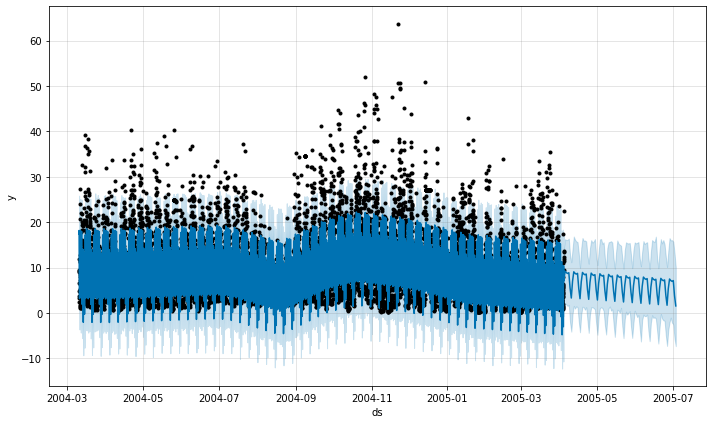

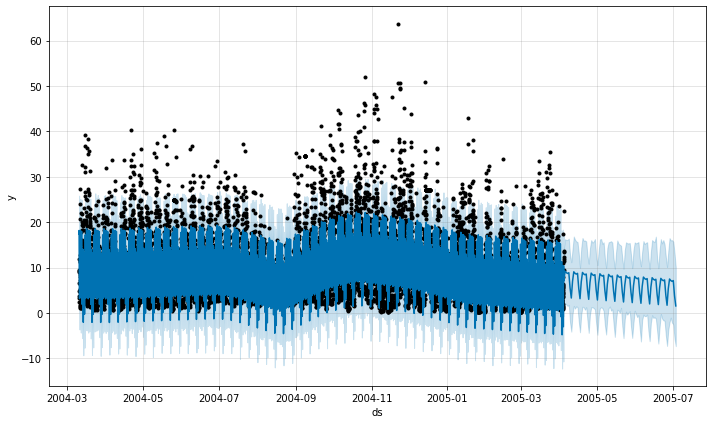

In [21]:
prediction = prophet.predict(future_dates)
prophet.plot(prediction)

In [22]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-03-10 18:00:00,10.084821,10.015883,24.917673,10.084821,10.084821,7.293653,7.293653,7.293653,5.892259,5.892259,5.892259,1.401394,1.401394,1.401394,0.0,0.0,0.0,17.378474
1,2004-03-10 19:00:00,10.084705,11.177636,25.849871,10.084705,10.084705,8.079897,8.079897,8.079897,6.697065,6.697065,6.697065,1.382832,1.382832,1.382832,0.0,0.0,0.0,18.164602
2,2004-03-10 20:00:00,10.084588,9.119675,23.518961,10.084588,10.084588,6.564607,6.564607,6.564607,5.199415,5.199415,5.199415,1.365192,1.365192,1.365192,0.0,0.0,0.0,16.649195
3,2004-03-10 21:00:00,10.084471,6.186021,20.767727,10.084471,10.084471,3.391038,3.391038,3.391038,2.042444,2.042444,2.042444,1.348595,1.348595,1.348595,0.0,0.0,0.0,13.475510
4,2004-03-10 22:00:00,10.084355,3.078712,18.002235,10.084355,10.084355,0.307883,0.307883,0.307883,-1.025281,-1.025281,-1.025281,1.333164,1.333164,1.333164,0.0,0.0,0.0,10.392238


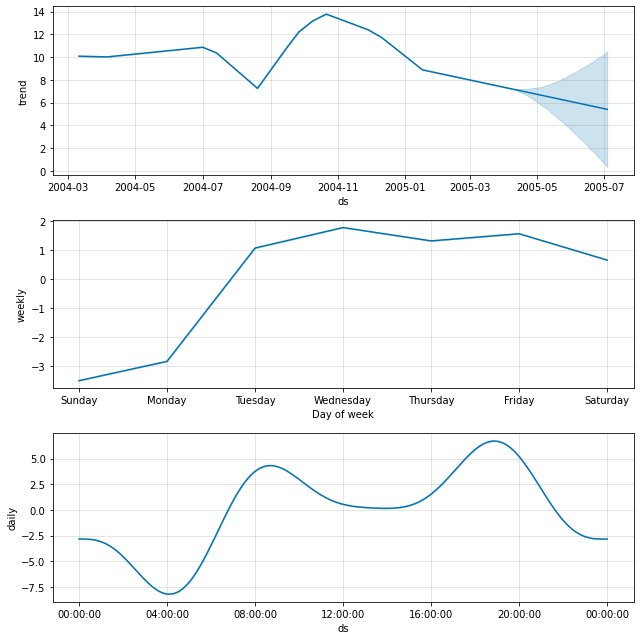

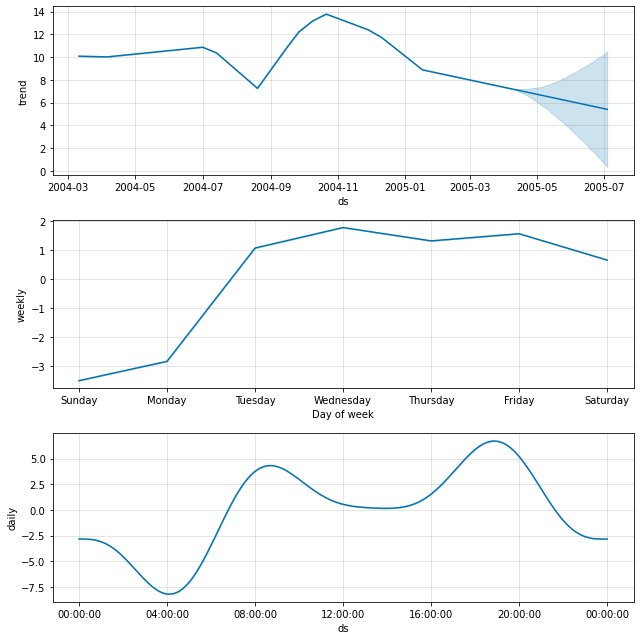

In [23]:
prophet.plot_components(prediction)

In [31]:
benzene_cv = cross_validation(prophet, horizon='30 days', period='30 days')

INFO:fbprophet:Making 9 forecasts with cutoffs between 2004-07-08 14:00:00 and 2005-03-05 14:00:00
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\ProgramData\Anaconda3\

In [32]:
benzene_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2004-07-08 15:00:00,13.130721,6.881112,19.262101,16.544980,2004-07-08 14:00:00
1,2004-07-08 16:00:00,14.093576,7.803368,20.245697,16.877332,2004-07-08 14:00:00
2,2004-07-08 17:00:00,16.299382,9.942292,22.660691,20.481013,2004-07-08 14:00:00
3,2004-07-08 18:00:00,18.823219,11.938815,24.721168,19.432529,2004-07-08 14:00:00
4,2004-07-08 19:00:00,19.868502,13.558786,26.144871,30.027160,2004-07-08 14:00:00


In [34]:
benzene_perf = performance_metrics(benzene_cv)
benzene_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 00:00:00,37.781577,6.146672,4.478961,0.896553,0.390118,0.811728
1,3 days 01:00:00,38.059638,6.169249,4.518120,0.906441,0.399171,0.808642
2,3 days 02:00:00,38.163373,6.177651,4.538346,0.910680,0.409439,0.807099
3,3 days 03:00:00,37.566874,6.129182,4.528139,0.910832,0.413173,0.807099
4,3 days 04:00:00,37.519126,6.125286,4.544812,0.917694,0.414211,0.804012


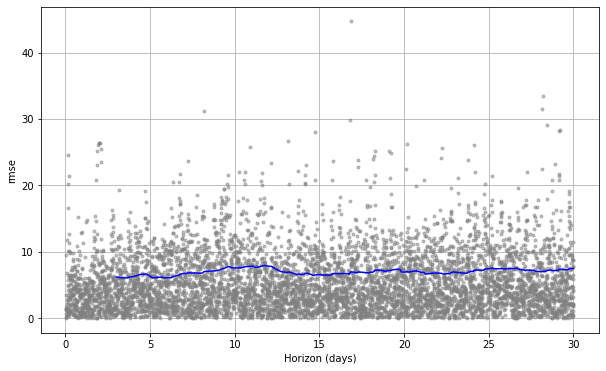

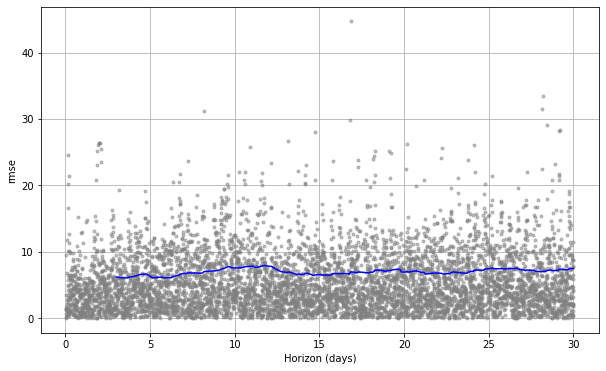

In [36]:
plot_cross_validation_metric(benzene_cv, metric='rmse')

## Modelling with LSTM 

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Layer, InputLayer, LSTM, Flatten

### Preprocessing the dataset

In [43]:
# Preparing Independent and Dependent Variables

def data_prep(data, n_features):
    """
    Function that accepts a series and returns two arrays of the features and the corresponding labels
    for training the LSTM model.
    
    data       -> Series that is going to be turned into the feature array
    n_features -> Number of features in the features array.
    """
    X, y =  [],[]
    for i in range(data.shape[0]):
        end_ix = i + n_features
        
        if end_ix > data.shape[0] - 1:
            break
        
        seq_x, seq_y = data.iloc[i:end_ix], data.iloc[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [49]:
# We are going to take 5 elements as a batch and hence, there shall be 5 columns for our X array

n_features=5

X, y = data_prep(benzene['y'], n_features=n_features)

In [50]:
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (9352, 5)
Shape of y: (9352,)


In [52]:
# Making the data 3-dimensional for the model

X = X.reshape(X.shape[0], X.shape[1], 1)
X.shape

(9352, 5, 1)

### Building LSTM model

In [53]:
# Defining the model

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=2)

Epoch 1/300
293/293 - 1s - loss: 31.8047
Epoch 2/300
293/293 - 1s - loss: 12.6765
Epoch 3/300
293/293 - 1s - loss: 12.3799
Epoch 4/300
293/293 - 1s - loss: 11.9217
Epoch 5/300
293/293 - 1s - loss: 11.9953
Epoch 6/300
293/293 - 1s - loss: 11.7861
Epoch 7/300
293/293 - 1s - loss: 11.6421
Epoch 8/300
293/293 - 1s - loss: 11.4873
Epoch 9/300
293/293 - 1s - loss: 11.5238
Epoch 10/300
293/293 - 1s - loss: 11.5292
Epoch 11/300
293/293 - 1s - loss: 11.6219
Epoch 12/300
293/293 - 1s - loss: 11.3464
Epoch 13/300
293/293 - 1s - loss: 11.2402
Epoch 14/300
293/293 - 1s - loss: 11.2447
Epoch 15/300
293/293 - 1s - loss: 11.2588
Epoch 16/300
293/293 - 1s - loss: 11.2147
Epoch 17/300
293/293 - 1s - loss: 11.0744
Epoch 18/300
293/293 - 1s - loss: 11.1132
Epoch 19/300
293/293 - 1s - loss: 11.0390
Epoch 20/300
293/293 - 1s - loss: 11.0315
Epoch 21/300
293/293 - 1s - loss: 11.1410
Epoch 22/300
293/293 - 1s - loss: 11.0724
Epoch 23/300
293/293 - 1s - loss: 10.9998
Epoch 24/300
293/293 - 1s - loss: 11.0340
E

Epoch 197/300
293/293 - 1s - loss: 7.1305
Epoch 198/300
293/293 - 1s - loss: 7.0745
Epoch 199/300
293/293 - 1s - loss: 6.9825
Epoch 200/300
293/293 - 1s - loss: 6.8456
Epoch 201/300
293/293 - 1s - loss: 6.8477
Epoch 202/300
293/293 - 1s - loss: 6.7983
Epoch 203/300
293/293 - 1s - loss: 7.0445
Epoch 204/300
293/293 - 1s - loss: 6.6378
Epoch 205/300
293/293 - 1s - loss: 6.7077
Epoch 206/300
293/293 - 1s - loss: 6.7827
Epoch 207/300
293/293 - 1s - loss: 6.7796
Epoch 208/300
293/293 - 1s - loss: 6.6767
Epoch 209/300
293/293 - 1s - loss: 6.9754
Epoch 210/300
293/293 - 1s - loss: 6.7295
Epoch 211/300
293/293 - 1s - loss: 6.5332
Epoch 212/300
293/293 - 1s - loss: 6.4982
Epoch 213/300
293/293 - 1s - loss: 6.3525
Epoch 214/300
293/293 - 1s - loss: 6.5339
Epoch 215/300
293/293 - 1s - loss: 6.4550
Epoch 216/300
293/293 - 1s - loss: 6.4682
Epoch 217/300
293/293 - 1s - loss: 6.4016
Epoch 218/300
293/293 - 1s - loss: 6.4689
Epoch 219/300
293/293 - 1s - loss: 6.7067
Epoch 220/300
293/293 - 1s - loss:

In [54]:
n_steps = 5
n_features = 1

In [55]:
# Prediction for next 10 days

x_input = y[-6:]  # The last 5 elements of the array y

temp_input=list(x_input)
lst_output=[]
i=0

while(i < 10):
    
    if(len(temp_input)>5):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

0 day input [13.52960473 11.35515741 12.3745384   9.54718667 11.9320599 ]
0 day output [[10.054681]]
1 day input [11.35515741 12.3745384   9.54718667 11.9320599  10.05468082]
1 day output [[10.09111]]
2 day input [12.3745384   9.54718667 11.9320599  10.05468082 10.09111023]
2 day output [[9.584439]]
3 day input [ 9.54718667 11.9320599  10.05468082 10.09111023  9.58443928]
3 day output [[10.974208]]
4 day input [11.9320599  10.05468082 10.09111023  9.58443928 10.97420788]
4 day output [[11.601109]]
5 day input [10.054681 10.09111   9.584439 10.974208 11.601109]
5 day output [[12.746095]]
6 day input [10.09111   9.584439 10.974208 11.601109 12.746095]
6 day output [[13.620691]]
7 day input [ 9.584439 10.974208 11.601109 12.746095 13.620691]
7 day output [[15.195952]]
8 day input [10.974208 11.601109 12.746095 13.620691 15.195952]
8 day output [[17.33423]]
9 day input [11.601109 12.746095 13.620691 15.195952 17.33423 ]
9 day output [[20.213959]]
[10.054681, 10.09111, 9.584439, 10.974208, 

In [56]:
day_new = np.arange(1,11)
day_pred = np.arange(10,20)

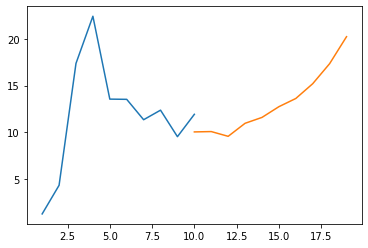

In [57]:
plt.plot(day_new, benzene['y'].iloc[-10:])
plt.plot(day_pred, lst_output);